In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("E:\\creditcard.csv")

In [3]:
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

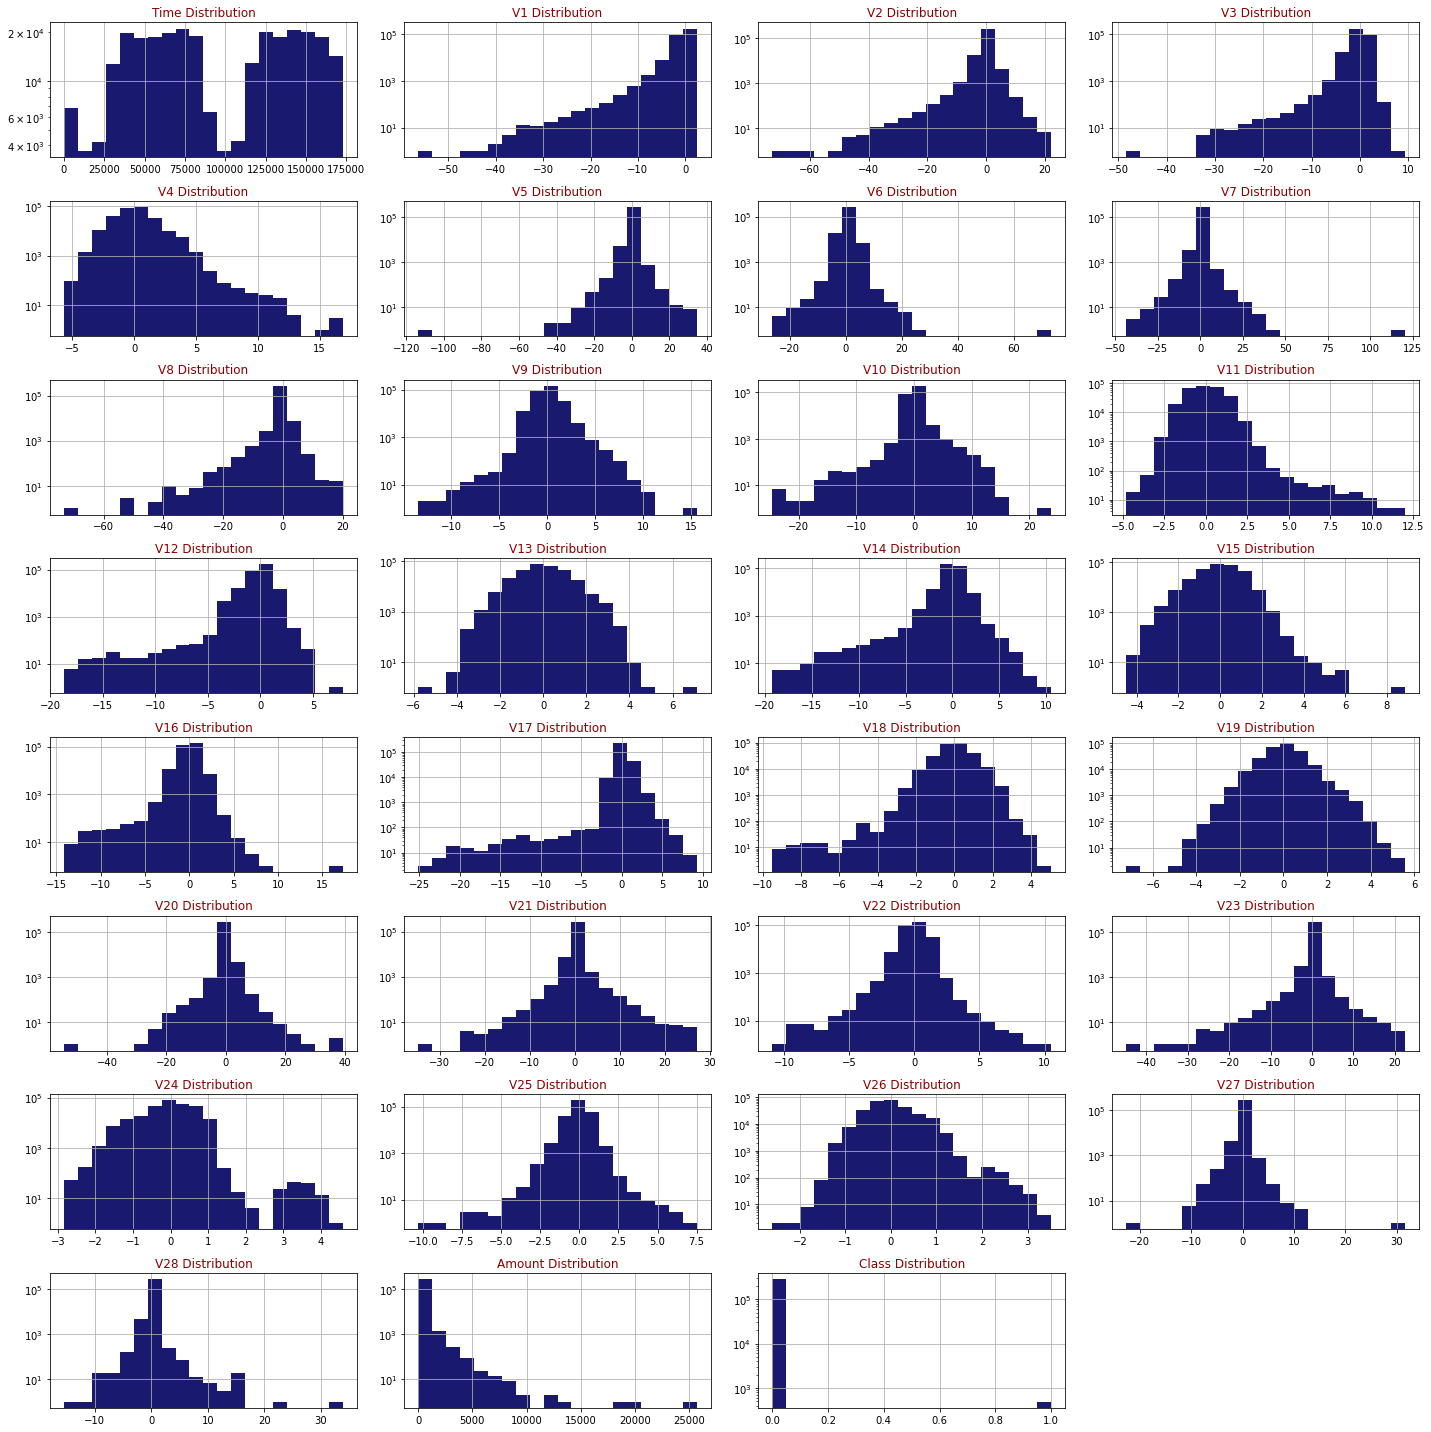

In [7]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df,df.columns,8,4)

## Independent and Dependent Features ##

In [8]:
X = df.drop("Class", axis=1)
y = df.Class

## Logistic Regression ##

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [10]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

In [12]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [13]:
y_pred=clf.predict(X_test)

## Confusion Matrix ##

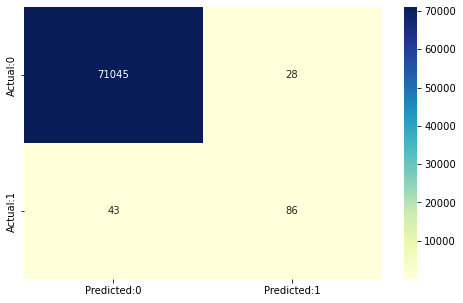

In [14]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [15]:
print(accuracy_score(y_test,y_pred))

0.9990028369989608


In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71073
           1       0.75      0.67      0.71       129

    accuracy                           1.00     71202
   macro avg       0.88      0.83      0.85     71202
weighted avg       1.00      1.00      1.00     71202



In [17]:
2*0.69*0.72/0.72+0.69

2.07

## Random Forest Classifier ##

In [18]:
classifier=RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [19]:
y_pred=classifier.predict(X_test)

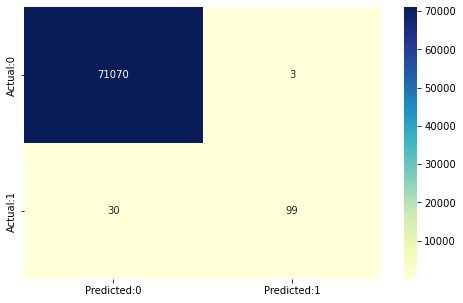

In [20]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [21]:
print(accuracy_score(y_test,y_pred))

0.9995365298727564


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71073
           1       0.97      0.77      0.86       129

    accuracy                           1.00     71202
   macro avg       0.99      0.88      0.93     71202
weighted avg       1.00      1.00      1.00     71202



## Importing imblearn library for performing under sampling :  ##

In [23]:
#pip install imbalanced-learn

## Performing Under Sampling : NearMiss ##
Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.

NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.

NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.

NearMiss-3: Majority class examples with minimum distance to each minority class example.

In [24]:
from collections import Counter
Counter(y_train)

Counter({0: 213242, 1: 363})

In [25]:
from collections import Counter

In [26]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()

In [27]:
#res=RandomUnderSampler(version=1, n_neighbors=3)
X_train_res,y_train_res=under_sampler.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 213242, 1: 363})
The number of classes after fit Counter({0: 363, 1: 363})


In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [29]:
y_pred=classifier.predict(X_test)

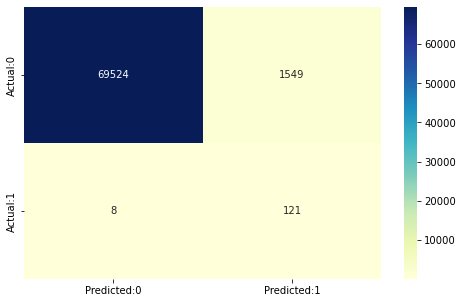

In [30]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [31]:
print(accuracy_score(y_test,y_pred))

0.9781326367236876


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71073
           1       0.07      0.94      0.13       129

    accuracy                           0.98     71202
   macro avg       0.54      0.96      0.56     71202
weighted avg       1.00      0.98      0.99     71202



## CatBoost: Overfit Detector

In [33]:
#pip install catboost

## map categorical features  ##

In [34]:
credit_catboost_ready_df = df.dropna() 

features = [feat for feat in list(credit_catboost_ready_df) if feat != 'Class']
print(features)
card_categories = np.where(credit_catboost_ready_df[features].dtypes != np.float)[0]
card_categories

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


C:\Users\hp\AppData\Local\Temp\ipykernel_23452\451492482.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  card_categories = np.where(credit_catboost_ready_df[features].dtypes != np.float)[0]


array([], dtype=int64)

In [35]:
SEED = 1234

from catboost import CatBoostClassifier 


params = {'iterations':5000,
        'learning_rate':0.01,
        'cat_features':card_categories,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': SEED
          }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True  
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7260058	best: 0.7260058 (0)	total: 300ms	remaining: 24m 57s
200:	test: 0.9867027	best: 0.9882802 (130)	total: 7.95s	remaining: 3m 9s
400:	test: 0.9867258	best: 0.9882802 (130)	total: 15.6s	remaining: 2m 59s
600:	test: 0.9865110	best: 0.9882802 (130)	total: 21.7s	remaining: 2m 39s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.9882802015
bestIteration = 130

Shrink model to first 131 iterations.


## AdaBoost Classifier: ##

## Adaboost library installing ##

In [36]:
#pip install ada-boost

In [37]:
RANDOM_STATE = 2018
NUM_ESTIMATORS = 100
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [38]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [39]:
clf.fit(df[predictors],df['Class'].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [40]:
y_pred = clf.predict(df[predictors])

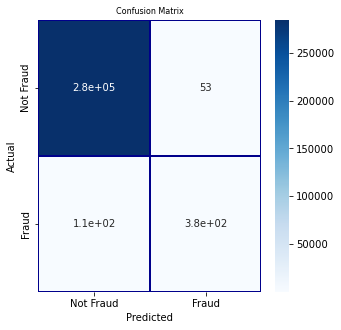

In [41]:
cm = pd.crosstab(df[target].values, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=8)
plt.show()

In [42]:
y_pred = cat_model.predict(X_test)

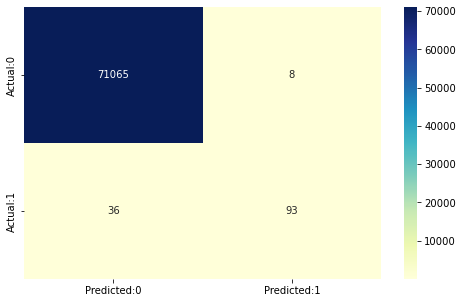

In [43]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

## SMOTE Analysis ##

In [44]:
#pip install imblearn

In [45]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [46]:
os=SMOTE(random_state=42)
X_train_ns,y_train_ns=oversample.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 213242, 1: 363})
The number of classes after fit Counter({0: 213242, 1: 213242})


In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [48]:
y_pred=classifier.predict(X_test)

In [49]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

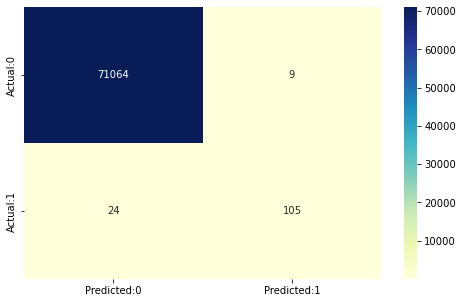

In [50]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [51]:
print(accuracy_score(y_test,y_pred))

0.9995365298727564


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71073
           1       0.92      0.81      0.86       129

    accuracy                           1.00     71202
   macro avg       0.96      0.91      0.93     71202
weighted avg       1.00      1.00      1.00     71202

